In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats

In [2]:
alt.renderers.enable('notebook')
alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [3]:
# Read the data
df = pd.read_csv('data/transfers/top250.csv')
# Let's look at the last few results to see until which date the data is present
df.tail()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000
4699,Kyle Bartley,Centre-Back,27,Swansea,Championship,West Brom,Championship,2018-2019,3500000.0,4500000


In [4]:
df.shape

(4700, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null object
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


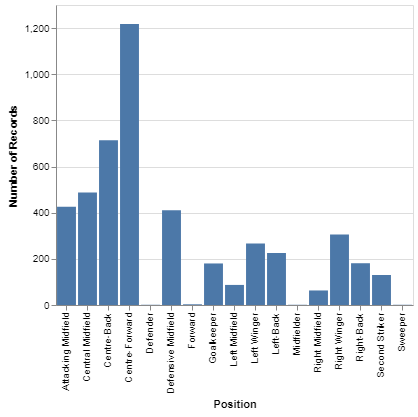

In [6]:
alt.Chart(df).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    #alt.Color('League_to')
)

In [7]:
df[df['Position']=='Defender']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
652,Sergio Hellings,Defender,17,Ajax U19,U19 Eredivisie,Anderlecht U19,Belgium,2002-2003,NaN,2000000


In [8]:
df[df['Position']=='Forward']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
188,Didier Martel,Forward,28,FC Utrecht,Eredivisie,Vitesse,Eredivisie,2000-2001,NaN,2750000
242,Patricio Camps,Forward,28,Vélez Sarsfield,Argentina,PAOK Saloniki,Super League,2000-2001,NaN,1850000
653,Mazhar Abdelrahman,Forward,25,El Masry,Premier League,Monaco,Ligue 1,2002-2003,NaN,2000000


In [9]:
lastseason = df[df['Season']=='2018-2019']
lastseason.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4457,Thomas Lemar,Left Winger,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000
4458,Riyad Mahrez,Right Winger,27,Leicester,Premier League,Man City,Premier League,2018-2019,50000000.0,67800000
4459,Alisson,Goalkeeper,25,AS Roma,Serie A,Liverpool,Premier League,2018-2019,60000000.0,62500000


In [10]:
lastseason.loc[lastseason['League_to']=='Série A', 'League_to']='Serie A'
lastseason.loc[lastseason['League_to']=='Premier Liga', 'League_to']='Russian Premier League'
lastseason.loc[lastseason['League_to']=='Super League', 'League_to']='Swiss Super League'
lastseason.loc[lastseason['League_to']=='Professional League', 'League_to']='Saudi Pro League'
lastseason.loc[lastseason['League_to']=='Liga NOS', 'League_to']='Portuguese Primeira Liga'
lastseason.loc[lastseason['League_to']=='1.Bundesliga', 'League_to']='Bundesliga'



lastseason['League_to'].value_counts()

c:\users\sarthak\documents\coding\soccerviz\env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Serie A                     60
Premier League              50
LaLiga                      35
Bundesliga                  33
Ligue 1                     16
Championship                11
Russian Premier League       8
Liga MX Apertura             7
Eredivisie                   6
Swiss Super League           4
Portuguese Primeira Liga     4
Saudi Pro League             3
MLS                          2
Primera División             1
Premiership                  1
Serie B                      1
LaLiga2                      1
UAE Gulf League              1
J1 League                    1
Name: League_to, dtype: int64

In [11]:
lastseason.loc[lastseason['League_from']=='Série A', 'League_from']='Serie A'
lastseason.loc[lastseason['League_from']=='Premier Liga', 'League_from']='Russian Premier League'
lastseason.loc[lastseason['League_from']=='Super League', 'League_from']='Swiss Super League'
lastseason.loc[lastseason['League_from']=='Professional League', 'League_from']='Saudi Pro League'
lastseason.loc[lastseason['League_from']=='Liga NOS', 'League_from']='Portuguese Primeira Liga'
lastseason.loc[lastseason['League_from']=='1.Bundesliga', 'League_from']='Bundesliga'
lastseason.loc[lastseason['League_from']=='Série B', 'League_from']='Serie B'
lastseason.loc[lastseason['League_from']==' Canada', 'League_from']='Canada'



lastseason['League_from'].value_counts()

Serie A                     53
Ligue 1                     31
LaLiga                      25
Bundesliga                  21
Premier League              19
Championship                15
Portuguese Primeira Liga    13
Liga MX Apertura             9
2.Bundesliga                 7
Ligue 2                      6
Serie B                      6
Swiss Super League           6
Eredivisie                   6
Primera División             5
Russian Premier League       4
Jupiler Pro League           4
League One                   3
1.HNL                        2
Süper Lig                    2
Superligaen                  2
Canada                       1
Premiership                  1
Proximus League              1
Botola Pro                   1
Liga Águila II               1
LaLiga2                      1
Name: League_from, dtype: int64

In [12]:
lastseason[lastseason['League_from']=='Liga Águila II']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4667,Yimmi Chará,Right Winger,27,Junior FC,Liga Águila II,Atlético-MG,Serie A,2018-2019,2500000.0,5100000


In [13]:
lastseason[lastseason['League_to'].isin(['Premiership','LaLiga2','Primera División','Serie B','J1 League'])]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4550,Odsonne Edouard,Centre-Forward,20,Paris SG,Ligue 1,Celtic,Premiership,2018-2019,1500000.0,10300000
4642,Diego Rolan,Centre-Forward,25,G. Bordeaux,Ligue 1,Dep. La Coruña,LaLiga2,2018-2019,3500000.0,6000000
4664,Carlos Izquierdoz,Centre-Back,29,Santos Laguna,Liga MX Apertura,Boca Juniors,Primera División,2018-2019,3000000.0,5150000
4680,Fabrício,Centre-Forward,28,Portimonense,Portuguese Primeira Liga,Urawa Reds,J1 League,2018-2019,4000000.0,5000000
4686,Pietro Iemmello,Centre-Forward,26,Sassuolo,Serie A,Benevento,Serie B,2018-2019,2000000.0,5000000


In [14]:
lastseason_cleaner = lastseason.drop(lastseason[lastseason['League_to'].isin(['Premiership','LaLiga2','Primera División','Serie B','J1 League','UAE Gulf League'])].index)
lastseason_cleaner['League_to'].value_counts()

Serie A                     60
Premier League              50
LaLiga                      35
Bundesliga                  33
Ligue 1                     16
Championship                11
Russian Premier League       8
Liga MX Apertura             7
Eredivisie                   6
Portuguese Primeira Liga     4
Swiss Super League           4
Saudi Pro League             3
MLS                          2
Name: League_to, dtype: int64

In [15]:
chart = alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'), title='Destination League')
).properties(width=350)

In [16]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position and Destination League')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

c:\users\sarthak\documents\coding\soccerviz\env\lib\site-packages\altair\utils\core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


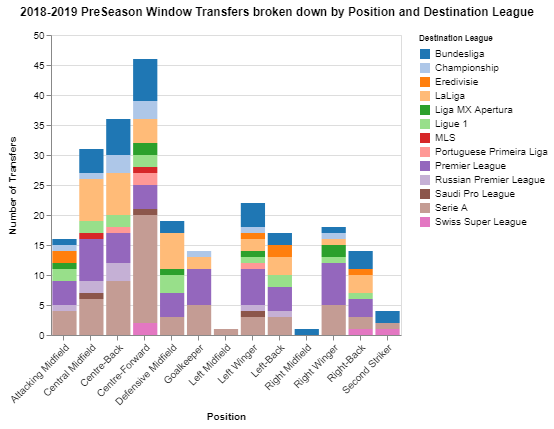

In [17]:
chart

In [18]:
chart.save('plots/transfer_position_league_to.png', scale_factor=7.0)

In [19]:
# More Colorblind friendly chart perhaps?
chart = alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='tableau20'), title='Destination League')
).properties(width=350)

In [20]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position and Destination League')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

c:\users\sarthak\documents\coding\soccerviz\env\lib\site-packages\altair\utils\core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


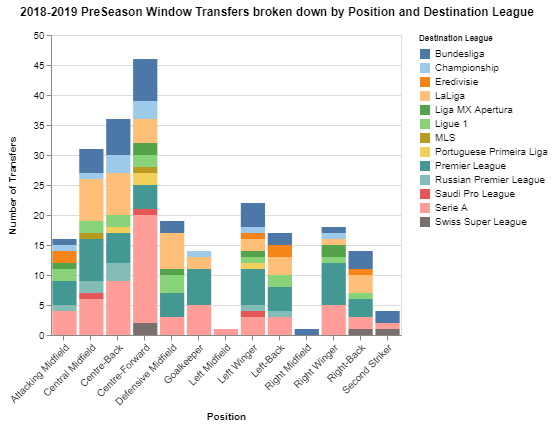

In [21]:
chart

In [22]:
chart.save('plots/transfer_position_league_to_cb.png', scale_factor=7.0)

In [23]:
lastseason_cleaner_top5 = lastseason_cleaner.drop(lastseason_cleaner[lastseason_cleaner['League_to'].isin(['Championship', 
                                                                                   'Russian Premier League', 
                                                                                   'Liga MX Apertura',
                                                                                   'Eredivisie',
                                                                                   'Swiss Super League',
                                                                                   'Portuguese Primeira Liga',
                                                                                   'Saudi Pro League',
                                                                                    'MLS'])].index)
lastseason_cleaner_top5['League_to'].value_counts()

Serie A           60
Premier League    50
LaLiga            35
Bundesliga        33
Ligue 1           16
Name: League_to, dtype: int64

In [24]:
chart = alt.Chart(lastseason_cleaner_top5).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45)),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', title='Destination League')
).properties(width=350)

In [25]:
chart = chart.properties(title='2018-2019 PreSeason Window Transfers broken down by Position - Top 5 Leagues')
chart = chart.configure(title = alt.VgTitleConfig(fontSize=12, offset=10, anchor='middle'))
chart = chart.configure_legend(titleFontSize=8)
chart = chart.configure_axis(titleFontSize=10)

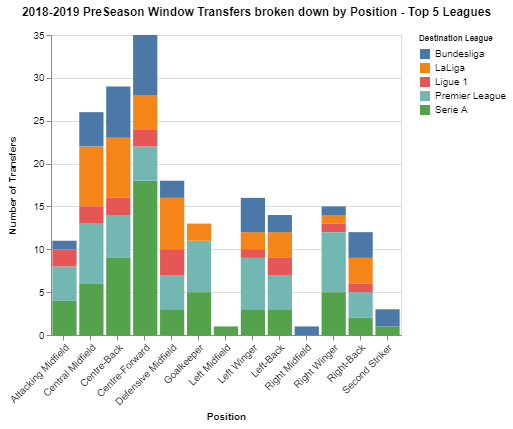

In [26]:
chart

In [27]:
chart.save('plots/transfer_position_league_to_top5.png', scale_factor=7.0)

In [36]:
lastseason[lastseason['Position'] == 'Second Striker']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4555,Vitinho,Second Striker,24,CSKA Moscow,Russian Premier League,Flamengo,Serie A,2018-2019,8000000.0,10000000
4652,Éder,Second Striker,31,Inter,Serie A,JS Suning,Swiss Super League,2018-2019,7000000.0,5700000
4659,Ishak Belfodil,Second Striker,26,Standard Liège,Jupiler Pro League,TSG Hoffenheim,Bundesliga,2018-2019,5500000.0,5500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,Bundesliga,2018-2019,4500000.0,4500000


In [63]:
request = lastseason_cleaner.copy()
request.loc[request['Position']=='Left Midfield', 'Position']='Left Winger'
request.loc[request['Position']=='Right Midfield', 'Position']='Right Winger'
request.loc[request['Name']=='Vitinho', 'Position']='Attacking Midfield'
request.loc[request['Name']=='Éder', 'Position']='Centre-Forward'
request.loc[request['Name']=='Ishak Belfodil', 'Position']='Centre-Forward'
request.loc[request['Name']=='Yuya Osako', 'Position']='Centre-Forward'

In [64]:
chart = alt.Chart(request).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45), sort=alt.Sort(field="Position", op="count", order="descending")),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'), title='Destination League')
).properties(width=350)

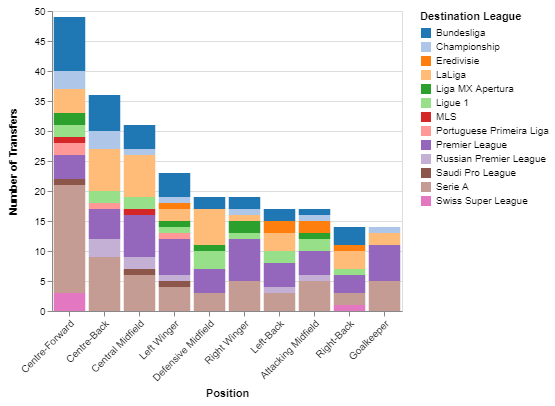

In [65]:
chart

In [66]:
chart.save('plots/transfer_request.png', scale_factor=7.0)

In [73]:
chart = alt.Chart(request).mark_bar().encode(
    alt.X('Position:N', axis = alt.Axis(labelAngle=-45), sort=['Goalkeeper', 'Left-Back', 'Centre-Back', 'Right-Back',
                                                               'Defensive Midfield', 'Central Midfield', 'Left Winger',
                                                               'Right Winger', 'Attacking Midfield', 'Centre-Forward']),
    alt.Y('count():Q', title='Number of Transfers'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'), title='Destination League')
).properties(width=350)

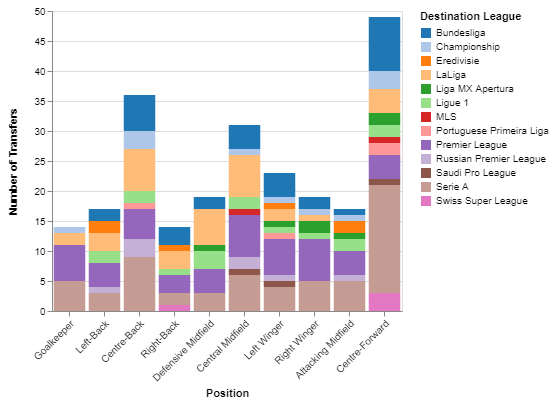

In [74]:
chart

In [75]:
chart.save('plots/transfer_request_2.png', scale_factor=7.0)

In [30]:
lastseason_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 4455 to 4699
Data columns (total 10 columns):
Name            239 non-null object
Position        239 non-null object
Age             239 non-null int64
Team_from       239 non-null object
League_from     239 non-null object
Team_to         239 non-null object
League_to       239 non-null object
Season          239 non-null object
Market_value    236 non-null float64
Transfer_fee    239 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 30.5+ KB


In [ ]:
alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Age:N'),
    alt.Y('count()'),
    alt.Color('Position:N', scale=alt.Scale(scheme='category20'))
)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('Age:N'),
    alt.Y('count()'),
    alt.Color('Position:N', scale=alt.Scale(scheme='category20'))
)

In [ ]:
alt.Chart(lastseason).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    alt.Color('League_from', scale=alt.Scale(scheme='category20'))
)

In [ ]:
alt.Chart(df).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('sum(Transfer_fee):Q'),
    alt.Color('Season', scale=alt.Scale(scheme='category20'))
)

In [ ]:
alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('League_from:N'),
    alt.Y('count():Q'),
    alt.Color('League_to', scale=alt.Scale(scheme='category20'))
)